In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root = r'/content/gdrive/My Drive/'
df = pd.concat([pickle.load(open(root+"df1.pickle", "rb")),pickle.load(open(root+"df2.pickle", "rb"))])

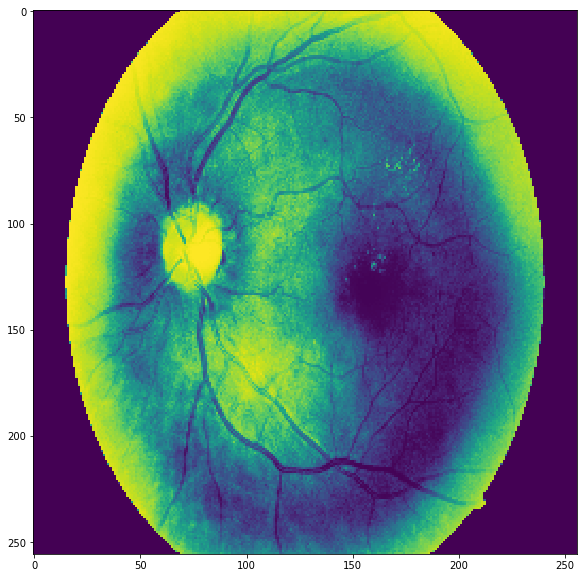

In [8]:
plt.rcParams['figure.figsize'] = 10,10
plt.imshow(df['eq_img'][4])

In [0]:
print(df.shape)

print(df.level.value_counts())

#making it binary labelling
df.level = np.where(df.level == 0,0, 1)

print(df.level.value_counts())

(88702, 3)
0    65343
1    23359
Name: level, dtype: int64
0    65343
1    23359
Name: level, dtype: int64


In [0]:
zerodf=df[df['level']==0][:13000]
onedf = df[df['level']==1][:13000]
neww=pd.DataFrame()
neww=neww.append(zerodf).append(onedf)
df = 0;
zerodf = 0
onedf = 0
neww.shape

(26000, 3)

In [0]:
zerodf=df[df['level']==0]

In [0]:
onedf=df[df['level']!=0]

In [0]:
zerodf.shape

(65343, 3)

In [0]:
onedf.shape

(23359, 3)

In [0]:
images = neww.eq_img
labels = neww.level
img = []

for row in images:
    img.append(np.array(row).flatten())

In [0]:
len(img)

26000

In [0]:
images = 0
neww = 0
img = np.array(img)

In [0]:
img.shape

img_rows = 256
img_cols = 256

In [0]:
(X, y) = (img, labels)

#Splitting the data into Train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)
# X_train = img[:14000]
# X_test = img[14000:]
# y_train = labels[:14000]
# y_test = labels[14000:]

print(X_train.shape)
print(X_test.shape)

img = 0
labels = 0

#Reshaping the flattened numpy array into a image matrix 
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(23400, 65536)
(2600, 65536)
X_train shape: (23400, 256, 256, 1)
23400 train samples
2600 test samples


In [0]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

Y_train[0]

array([0., 1.], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import LeakyReLU, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator

# import optimizer
import keras

#batch_size to train
batch_size = 64
# number of output classes
nb_classes = 2
# number of epochs to train
nb_epoch = 5
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [0]:
# create generators  - training data will be augmented images
validationdatagenerator = ImageDataGenerator()
traindatagenerator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

batchsize=2
train_generator=traindatagenerator.flow(X_train, Y_train, batch_size=batchsize) 
validation_generator=validationdatagenerator.flow(X_test, Y_test,batch_size=batchsize)

In [0]:
del model

In [0]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same', input_shape=(img_cols, img_rows,1), activity_regularizer=keras.regularizers.l2(0.001), strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))

model.add(Conv2D(64,kernel_size=(3,3),padding='same', strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))




model.add(Conv2D(128,kernel_size=(3,3),padding='same', strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(rate=0.1))         #add dropout to prettify this big-ass cnn



model.add(Conv2D(256,kernel_size=(3,3),padding='same', strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(rate=0.1))         #add dropout to prettify this big-ass cnn
model.add(Conv2D(256,kernel_size=(3,3),padding='same', strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(rate=0.1))


model.add(Conv2D(512,kernel_size=(3,3),padding='same', strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(rate=0.1))         #add dropout to prettify this big-ass cnn
model.add(Conv2D(512,kernel_size=(3,3),padding='same', strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(rate=0.5))         #add dropout to prettify this big-ass cnn

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU(0.01))
# model.add(Dropout(rate=0.5))


model.add(Dense(1024))
model.add(LeakyReLU(0.01))

model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

manual_optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0)
model.compile(loss='binary_crossentropy', optimizer=manual_optimizer, metrics=['accuracy'])

In [0]:
from keras.callbacks import History
history = History()
n=8

In [0]:
history = model.fit_generator(train_generator, steps_per_epoch=int(len(X_train)/n), epochs=3, validation_data=validation_generator,verbose=True, validation_steps=int(len(X_test)/n))

Epoch 1/30
2925/2925 [==============================] - 65s 22ms/step - loss: 0.7297 - acc: 0.5125 - val_loss: 0.8418 - val_acc: 0.4700
Epoch 2/30
2925/2925 [==============================] - 65s 22ms/step - loss: 0.7217 - acc: 0.4901 - val_loss: 0.7108 - val_acc: 0.5138
Epoch 3/30
2925/2925 [==============================] - 64s 22ms/step - loss: 0.7168 - acc: 0.5067 - val_loss: 0.7287 - val_acc: 0.5431
Epoch 4/30
2925/2925 [==============================] - 66s 23ms/step - loss: 0.7166 - acc: 0.5004 - val_loss: 0.7095 - val_acc: 0.4915
Epoch 5/30
2925/2925 [==============================] - 67s 23ms/step - loss: 0.7129 - acc: 0.5103 - val_loss: 0.7092 - val_acc: 0.5277
Epoch 6/30
2925/2925 [==============================] - 65s 22ms/step - loss: 0.7159 - acc: 0.4967 - val_loss: 0.7311 - val_acc: 0.5054
Epoch 7/30
2925/2925 [==============================] - 65s 22ms/step - loss: 0.7131 - acc: 0.4962 - val_loss: 0.7111 - val_acc: 0.5015
Epoch 8/30
2925/2925 [==========================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

In [0]:

#Sample Prediction 
i = 
print(model.predict(i))
print (Y_test[5])

In [0]:
for i in range(25000):
    print (model.predict(np.expand_dims(X_test[i], axis=0)))

[[0.5196229 0.4861968]]
[[0.5193808  0.48421586]]
[[0.52195907 0.48594263]]
[[0.557853   0.45151934]]
[[0.55273545 0.4566233 ]]
[[0.52203685 0.48796102]]
[[0.56859285 0.43867737]]
[[0.5363175  0.46212074]]
[[0.516962  0.4903416]]
[[0.5340856  0.46785894]]
[[0.53139484 0.47132668]]
[[0.5432859  0.46311778]]
[[0.54177696 0.46063563]]
[[0.52055323 0.48341975]]
[[0.5480979  0.45430395]]
[[0.5190401 0.484489 ]]
[[0.564801   0.44095647]]
[[0.5223709  0.47503915]]
[[0.5217375  0.47924945]]
[[0.5503261  0.45756736]]
[[0.551867   0.45795876]]
[[0.52084494 0.48479086]]
[[0.51974785 0.4789849 ]]
[[0.51830596 0.4869896 ]]
[[0.52912974 0.48248458]]
[[0.5324592 0.4735028]]
[[0.5244787  0.48453376]]
[[0.5518757 0.4498299]]
[[0.52298003 0.484907  ]]
[[0.5531807 0.4525324]]
[[0.54930514 0.45306212]]
[[0.527875 0.479375]]
[[0.53118825 0.47376937]]
[[0.52628124 0.4807035 ]]
[[0.543779   0.46078694]]
[[0.53535324 0.46565577]]
[[0.52884126 0.4752748 ]]
[[0.5444983  0.46265322]]
[[0.5637376 0.4422136]]
[[0.

IndexError: ignored